In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import sys 
sys.path.append('/home/your_username/eht_stuff/ehtplot')
import ehtplot.color # installed using https://github.com/liamedeiros/ehtplot (only necessary if you want cfun="afmhot_10us", the colormap used in EHT papers)

Helper functions

In [2]:
def get_l2_distance(img1, img2):
    return np.linalg.norm(img1 - img2)

In [3]:
source_dir = 'sources_06_07/'

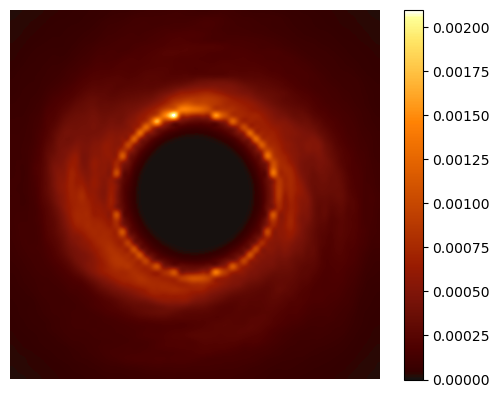

In [6]:
# make a version including colorbar
image_idx = 0
test_img = np.load(source_dir + 'black_hole_{}.npy'.format(image_idx))
plt.imshow(test_img, cmap='afmhot_10us', interpolation='spline36')
plt.colorbar()
plt.axis('off')
plt.savefig('black_hole_colorbar.pdf', bbox_inches='tight', transparent=True)

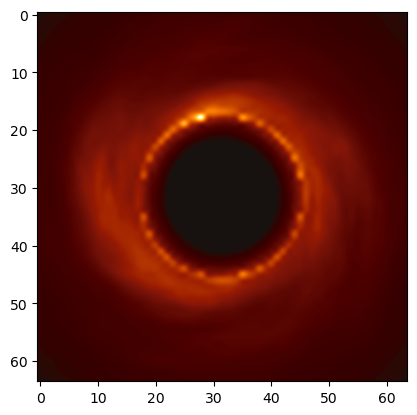

In [4]:
image_idx = 0
test_img = np.load(source_dir + 'black_hole_{}.npy'.format(image_idx))
plt.imshow(test_img, cmap='afmhot_10us', interpolation='spline36')

727 0.016061260434795742
9703 0.014016249497643327 9703 0.025225771511271186


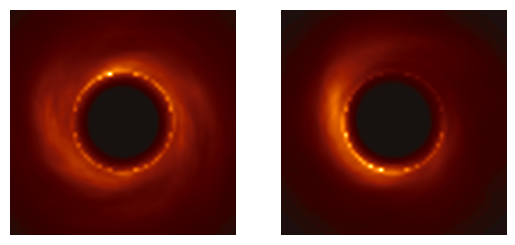

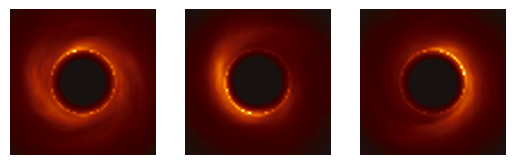

In [5]:
max_value = 0
max_idx = 0 

base_idx = 0
test_img = np.load(source_dir + 'black_hole_{}.npy'.format(base_idx))
for image_idx in range(1, 10000):
    img = np.load(source_dir + 'black_hole_{}.npy'.format(image_idx))
    l2_distance = get_l2_distance(test_img, img)
    if l2_distance > max_value:
        max_value = l2_distance
        max_idx = image_idx

print(max_idx, max_value)
second_idx = max_idx
second_img = np.load(source_dir + 'black_hole_{}.npy'.format(second_idx))
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(second_img, cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')

max_value_base = 0 
max_value_third = 0
max_idx_base = 0
max_idx_third = 0

for image_idx in range(1, 10000):
    if image_idx != base_idx and image_idx != second_idx:
        # want the image to be different from both of the base images 
        img = np.load(source_dir + 'black_hole_{}.npy'.format(image_idx))
        l2_distance_base = get_l2_distance(test_img, img)
        l2_distance_second = get_l2_distance(second_img, img)
        if l2_distance_base > max_value_base and l2_distance_second > max_value_third:
            max_value_base = l2_distance_base
            max_value_third = l2_distance_second
            max_idx_base = image_idx
            max_idx_third = image_idx
print(max_idx_base, max_value_base, max_idx_third, max_value_third)
plt.figure()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(test_img, cmap='afmhot_10us', interpolation='spline36')
plt.subplot(1, 3, 2)
plt.imshow(second_img, cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(max_idx_third)), cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')

final_indices = [base_idx, second_idx, max_idx_third]

In [10]:
print(final_indices)
final_indice_archive = [0, 727, 9703]
assert final_indices == final_indice_archive

[0, 727, 9703]


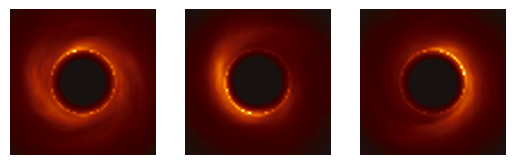

In [6]:
plt.figure()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[0])), cmap='afmhot_10us', interpolation='spline36')
plt.subplot(1, 3, 2)
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[1])), cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[2])), cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.savefig('black_hole_examples.pdf', bbox_inches='tight', transparent=True)

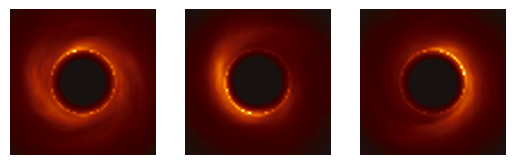

In [ ]:
plt.figure()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[0])), cmap='afmhot_10us', interpolation='spline36')
plt.subplot(1, 3, 2)
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[1])), cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(np.load(source_dir + 'black_hole_{}.npy'.format(final_indices[2])), cmap='afmhot_10us', interpolation='spline36')
plt.axis('off')
plt.savefig('black_hole_examples.pdf', bbox_inches='tight', transparent=True)

## Load measurements corresponding to these selected black holes

In [7]:
telescope_array_list = ['observations_alma_apex_pv_smt/', 'observations_jmct_sma_alma_pv/', 'observations_pv_sma_alma_spt/', 'observations_pv_sma_spt_apex/', 'observations_pv_sma_spt_jcmt/']
telescope_array_list = [telescope_array_list[0], telescope_array_list[1], telescope_array_list[3]]

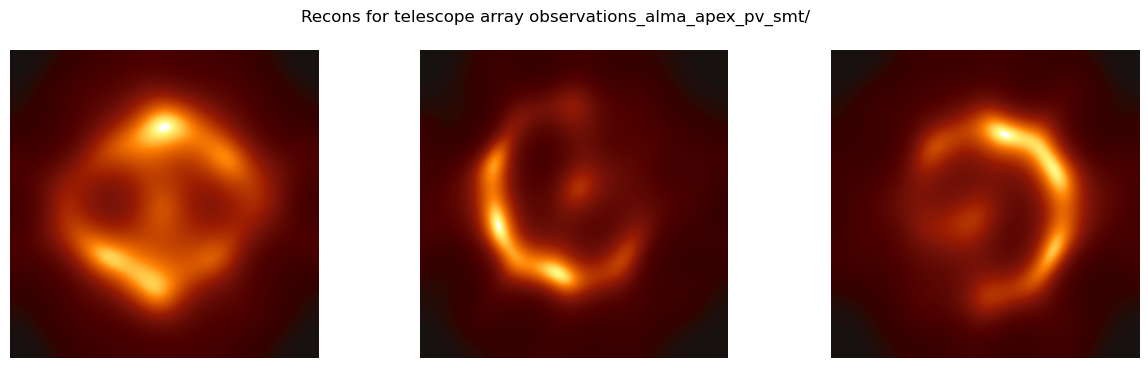

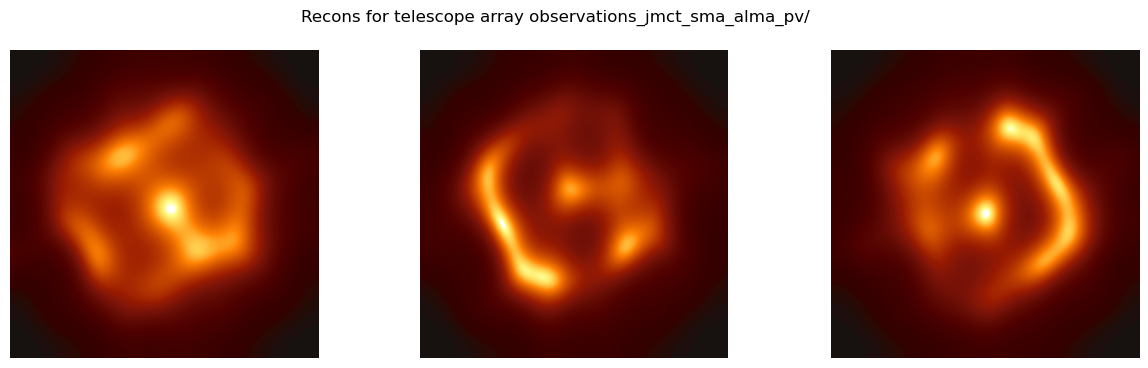

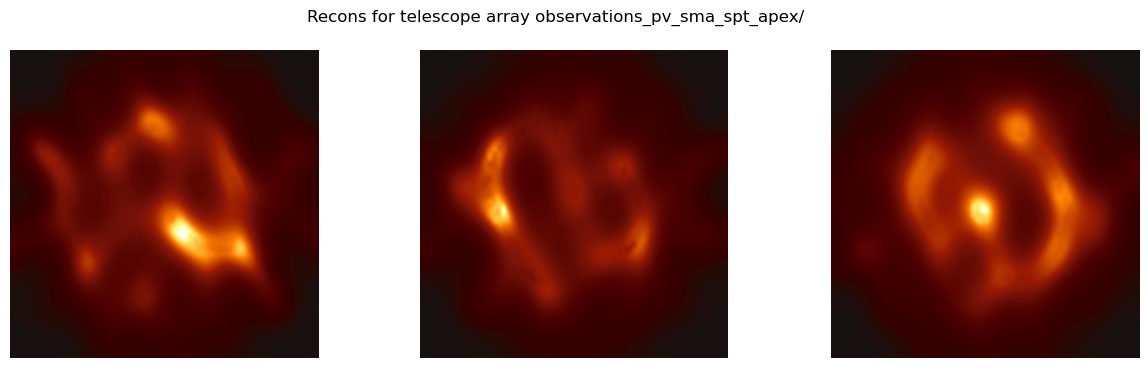

In [8]:
for telescope_array in telescope_array_list: 
    recons = [] 
    for image_idx in final_indices: 
        recon_image = np.load(telescope_array + 'rml_recons/{}.npy'.format(image_idx))
        recons.append(recon_image)
    plt.figure(figsize=(15, 4)) 
    plt.suptitle("Recons for telescope array {}".format(telescope_array))
    plt.subplot(1, 3, 1)
    plt.axis('off')
    plt.imshow(recons[0], cmap='afmhot_10us', interpolation='spline36')
    plt.subplot(1, 3, 2)
    plt.imshow(recons[1], cmap='afmhot_10us', interpolation='spline36')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(recons[2], cmap='afmhot_10us', interpolation='spline36')
    plt.axis('off')
    plt.savefig('recons_{}.pdf'.format(telescope_array[:-1]), bbox_inches='tight', transparent=True)


## Plot complex measurements corresponding to these selected black holes

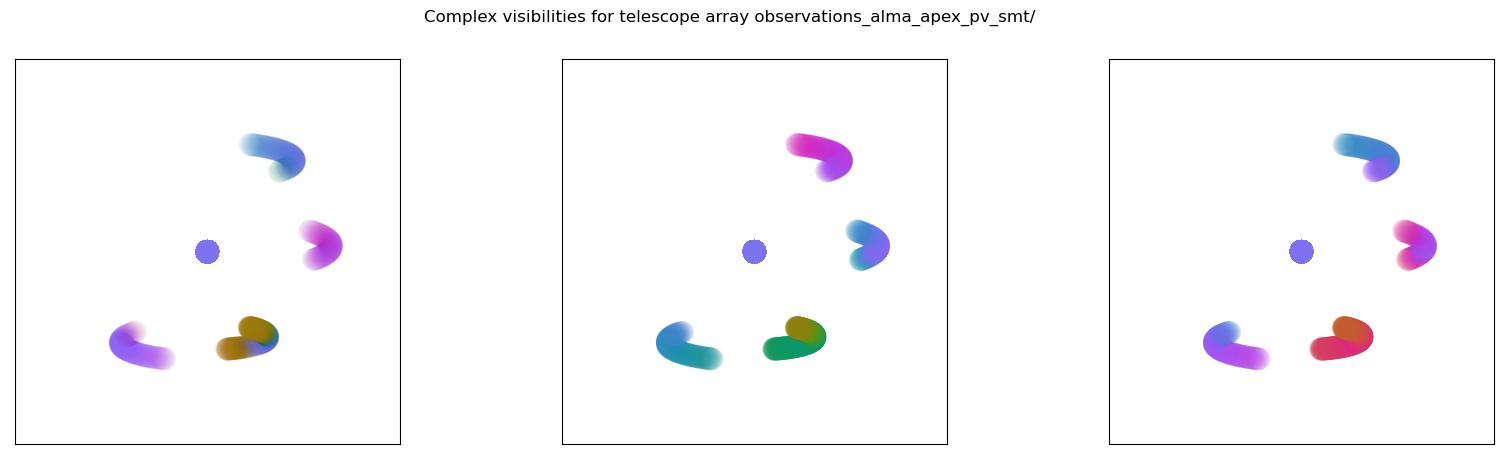

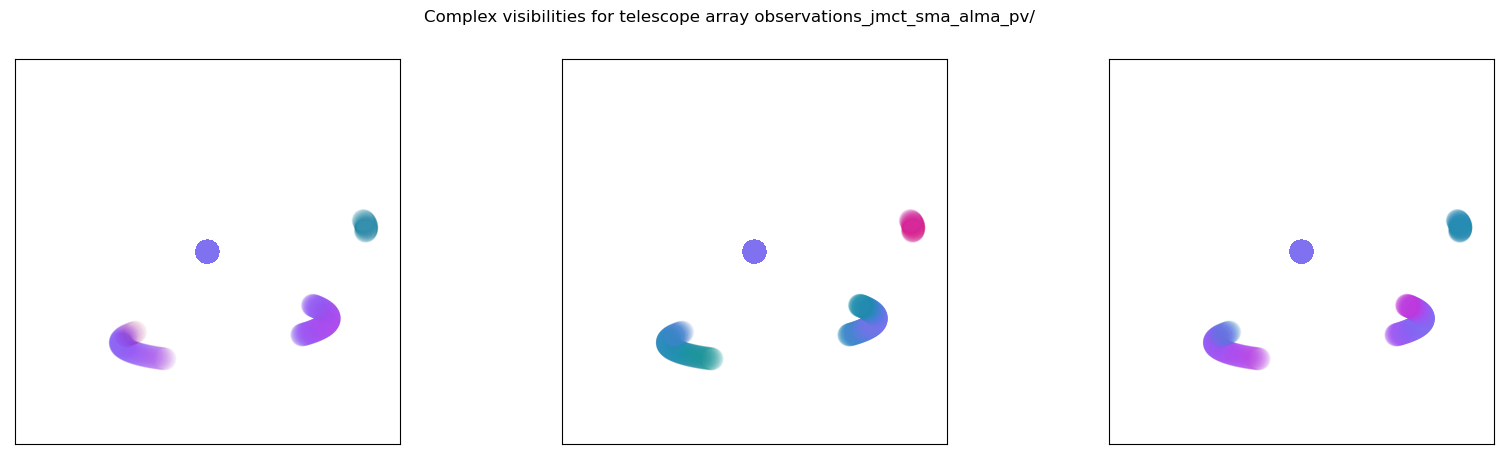

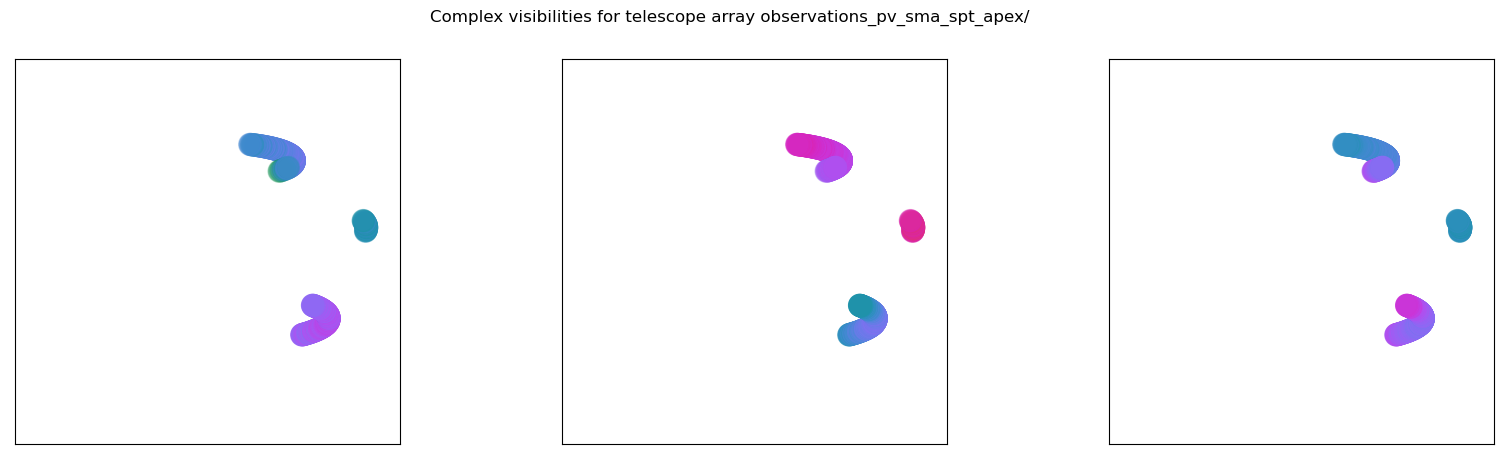

In [20]:
for telescope_array in telescope_array_list: 
    uv_coordinates = np.load(telescope_array + 'uv.npy')
    complex_measurements = []
    for image_idx in final_indices: 
        complex_measurement = np.load(telescope_array + 'visibilities_s/visibilities/{}.npy'.format(image_idx))
        complex_measurements.append(complex_measurement)
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    for meas_idx, complex_measurement in enumerate(complex_measurements): 
        phases = np.angle(complex_measurement) 
        magnitudes = np.abs(complex_measurement)

        alphas = magnitudes / magnitudes.max()

        cmap = cmocean.cm.phase_r
        # Normalize phase values to the range [0, 1] for colormap mapping
        norm = plt.Normalize(vmin=-np.pi, vmax=np.pi)
        normalized_phases = norm(phases)

        # Get RGBA colors from the colormap based on normalized phases
        colors = cmap(normalized_phases)
        # Set the alpha channel of each color according to the normalized magnitudes
        colors[..., -1] = alphas  # The alpha channel is the last element in the RGBA array

        scatter = axs[meas_idx].scatter(uv_coordinates[:, 0], uv_coordinates[:, 1], color=colors, s=250) # make marker sizes bigger
        axs[meas_idx].set_xlim(-1e10, 1e10)
        axs[meas_idx].set_ylim(-1e10, 1e10)
        axs[meas_idx].set_aspect('equal')
        # turn off axis labels 
        axs[meas_idx].set_xticks([])
        axs[meas_idx].set_yticks([])
        # Create a colorbar to show the phase mapping
        mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        mappable.set_array(phases)
        #cbar = plt.colorbar(mappable, ax=axs[meas_idx])
        #cbar.set_label('Phase (radians)')
    plt.suptitle("Complex visibilities for telescope array {}".format(telescope_array))
    plt.savefig('visibilities_{}.pdf'.format(telescope_array[:-1]), bbox_inches='tight', transparent=True)
